In [2]:
from symbol import parameters
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm, preprocessing, metrics
from sklearn.model_selection import train_test_split, GridSearchCV
model = svm.SVC(kernel='rbf', C=1.0,gamma=0.001)

In C:\Users\Jackie_chen\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\Jackie_chen\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\Jackie_chen\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\Jackie_chen\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\Jackie_chen\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [3]:
import pandas as pd
df_data = pd.read_csv('data.csv')


In [4]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df_data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
"""类别特征向量化"""
le = preprocessing.LabelEncoder()
le.fit(df_data['diagnosis'])
df_data['diagnosis'] = le.transform(df_data['diagnosis'])




In [7]:
#print(df_data['diagnosis'])

In [8]:
"""提取特征"""
#提取mean字段和lable字段
df_data_X = df_data.filter(regex='_mean')
df_data_Y = df_data['diagnosis']
#df_data_X.describe()

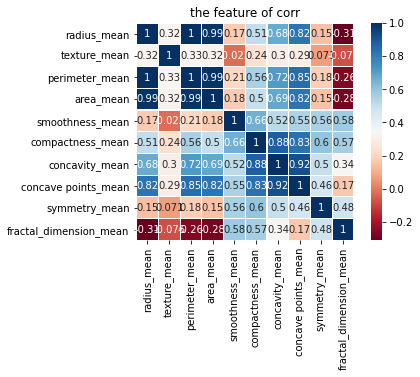

In [9]:
sns.heatmap(df_data[df_data_X.columns].corr(), linewidths=0.1, vmax=1.0, square=True,
            cmap=sns.color_palette('RdBu', n_colors=256),
            linecolor='white', annot=True)
plt.title('the feature of corr')
plt.show()





In [10]:
df_data_X = df_data_X.drop(['radius_mean', 'area_mean'], axis=1)


In [11]:
"""进行特征归一化/缩放"""
scalar = preprocessing.StandardScaler()
df_data_X = scalar.fit_transform(df_data_X)
print(df_data_X)
print(df_data_Y)



[[-2.07333501e+00  1.26993369e+00  1.56846633e+00 ...  2.53247522e+00
   2.21751501e+00  2.25574689e+00]
 [-3.53632408e-01  1.68595471e+00 -8.26962447e-01 ...  5.48144156e-01
   1.39236330e-03 -8.68652457e-01]
 [ 4.56186952e-01  1.56650313e+00  9.42210440e-01 ...  2.03723076e+00
   9.39684817e-01 -3.98007910e-01]
 ...
 [ 2.04557380e+00  6.72675785e-01 -8.40483881e-01 ...  1.05777359e-01
  -8.09117071e-01 -8.95586935e-01]
 [ 2.33645719e+00  1.98252415e+00  1.52576706e+00 ...  2.65886573e+00
   2.13719425e+00  1.04369542e+00]
 [ 1.22179204e+00 -1.81438851e+00 -3.11208479e+00 ... -1.26181958e+00
  -8.20069901e-01 -5.61032377e-01]]
0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32


In [14]:
"""因为不知道是否线性可分所以先试"""
"""LinearSVC模型"""
#切分数据集
X_train, X_test, Y_train, Y_test = train_test_split(df_data_X, df_data_Y, test_size=0.2)
#创建SVM分类器
model = svm.LinearSVC()
#用训练集做训练
model.fit(X_train, Y_train)
#用测试集做预测
pred_label = model.predict(X_test)
print('准确率： ', metrics.accuracy_score(pred_label, Y_test))

准确率：  0.9649122807017544


In [15]:
"""通过网格寻找最优参数"""
parameters = {
    #统计学习方法P115 间隔最大化即 MAX 1/||w|| ==> MIN ||w||^2/2
    #gamma = ||w||^2/2时 如果 gamma 过于小，C太大，模型受限制太多，被选定的支持向量的辐射范围很大，
    #任何一个支持向量都会影响到整个数据集，使得模型无法捕捉到较为复杂的模式。
    'gamma': np.linspace(0.0001, 0.1),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
}
model = svm.SVC()
grid_model = GridSearchCV(model, parameters, cv=10, return_train_score=True)
grid_model.fit(X_train, Y_train)
#用测试集做预测
pred_label = grid_model.predict(X_test)
print('准确率： ', metrics.accuracy_score(pred_label, Y_test))
#输出模型最优参数
print(grid_model.best_params_)



准确率：  0.9736842105263158
{'gamma': 0.051069387755102044, 'kernel': 'rbf'}
